## ECN 441B In-Class Lab Assignment 2
By: George Musabandesu

# 1.) Pull in Data and Convert ot Monthly

In [47]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [49]:
df.head()

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


In [50]:
# Difference in stock price
df["Diff"] = df["Adj Close"].diff().shift(-1)
# target
df["Target"] = np.sign(df["Diff"])

#Option Premium
df['Premium'] = 0.08 * df['Adj Close']   

In [51]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [53]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [54]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[: "2023-09-30",:].copy()

In [57]:
# Fitting the regression
LogReg = LogisticRegression()
LogReg.fit(X, y)
y_pred = LogReg.predict(X)

# 4.) Add columns, prediction and profits.

In [58]:
df['Predictions'] = y_pred

In [59]:
df['Profits']=0.

#True Positives 
df.loc[(df['Predictions']==1) & (df['Target']==1),'Profits']=df.loc[(df['Predictions']==1) & (df['Target']==1),'Premium']

#False Positives
df.loc[(df['Predictions']==1) & (df['Target']==-1),'Profits']=100*df.loc[(df['Predictions']==1) & (df['Target']==-1),'Diff']

# 5.) Plot profits over time

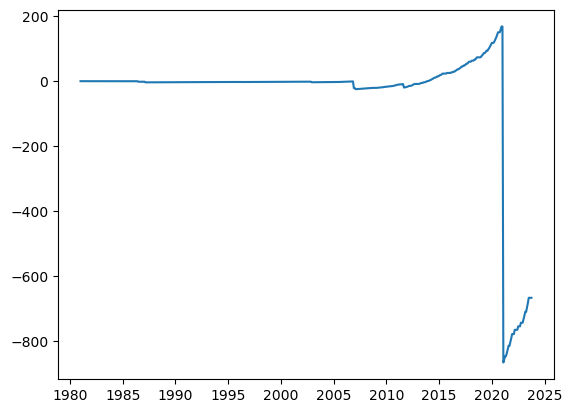

In [60]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

Being able to predict what the future profit outcomes are for any firm is useful information. Through the MQE program, I am gaining such and additional skills which will inform decision makers on what profitable approaches to invest in. I am gaining industry-relevant skills on working with data to derive beneficial meaning to its users.